### Building an RNN Model on titan stock price

Import required packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras import models
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import SimpleRNN
import tensorflow as tf

# Loading the data :

In [ ]:
#importing the training dataset
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
dataset_train = pd.read_csv("train.csv")
dataset_train

,Date,Open,High,Low,Close,Volume
0,01-01-2018,857.70,862.05,851.05,852.45,472607
1,02-01-2018,854.10,858.45,840.60,845.15,1181949
2,03-01-2018,863.90,869.40,853.00,856.30,2606556
3,04-01-2018,864.40,897.45,853.10,892.90,3028931
4,05-01-2018,895.00,913.95,893.50,909.70,4036882
...,...,...,...,...,...,...
486,24-12-2019,1206.05,1222.00,1200.65,1204.10,2236779
487,26-12-2019,1209.95,1213.75,1190.60,1192.50,1800229
488,27-12-2019,1196.45,1199.20,1184.85,1191.45,1332568
489,30-12-2019,1195.00,1198.00,1183.10,1193.75,1109808


In [ ]:
#Selected Open column
training_set = dataset_train.iloc[:,1:2].values
training_set

array([[ 857.7 ],
       [ 854.1 ],
       [ 863.9 ],
       [ 864.4 ],
       [ 895.  ],
       [ 911.  ],
       [ 925.  ],
       [ 932.5 ],
       [ 916.9 ],
       [ 906.  ],
       [ 909.  ],
       [ 927.  ],
       [ 892.8 ],
       [ 897.75],
       [ 879.1 ],
       [ 890.  ],
       [ 910.7 ],
       [ 905.7 ],
       [ 882.  ],
       [ 887.4 ],
       [ 899.25],
       [ 883.  ],
       [ 877.5 ],
       [ 810.  ],
       [ 810.  ],
       [ 765.  ],
       [ 785.  ],
       [ 785.1 ],
       [ 790.1 ],
       [ 803.  ],
       [ 814.  ],
       [ 822.7 ],
       [ 820.  ],
       [ 805.  ],
       [ 803.95],
       [ 837.95],
       [ 825.  ],
       [ 822.2 ],
       [ 819.95],
       [ 825.  ],
       [ 819.8 ],
       [ 814.  ],
       [ 810.  ],
       [ 812.5 ],
       [ 806.  ],
       [ 820.  ],
       [ 820.  ],
       [ 824.  ],
       [ 836.  ],
       [ 851.  ],
       [ 864.9 ],
       [ 879.  ],
       [ 879.7 ],
       [ 867.  ],
       [ 875.  ],
       [ 8

In [ ]:
#feature scaling using min max scaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.17648918],
       [0.17080107],
       [0.18628535],
       [0.18707537],
       [0.23542424],
       [0.26070469],
       [0.28282509],
       [0.2946753 ],
       [0.27002686],
       [0.25280455],
       [0.25754464],
       [0.28598515],
       [0.23194818],
       [0.23976932],
       [0.21030179],
       [0.2275241 ],
       [0.26023068],
       [0.25233054],
       [0.21488387],
       [0.22341602],
       [0.24213936],
       [0.2164639 ],
       [0.20777374],
       [0.10112182],
       [0.10112182],
       [0.03002054],
       [0.06162111],
       [0.06177911],
       [0.06967925],
       [0.09006162],
       [0.10744193],
       [0.12118818],
       [0.1169221 ],
       [0.09322168],
       [0.09156265],
       [0.14528362],
       [0.12482225],
       [0.12039817],
       [0.1168431 ],
       [0.12482225],
       [0.1166061 ],
       [0.10744193],
       [0.10112182],
       [0.10507189],
       [0.09480171],
       [0.1169221 ],
       [0.1169221 ],
       [0.123

In [ ]:
#creating a dta structure with 20 points as inputs as 1 point as output in a rolling fashion
X_train = []
Y_train = []

for i in range(30, 491):
  X_train.append(training_set_scaled[i-30:i,0])
  Y_train.append(training_set_scaled[i,0])

X_train, Y_train, = np.array(X_train), np.array(Y_train)
X_train

array([[0.17648918, 0.17080107, 0.18628535, ..., 0.06177911, 0.06967925,
        0.09006162],
       [0.17080107, 0.18628535, 0.18707537, ..., 0.06967925, 0.09006162,
        0.10744193],
       [0.18628535, 0.18707537, 0.23542424, ..., 0.09006162, 0.10744193,
        0.12118818],
       ...,
       [0.66045189, 0.67467214, 0.65436878, ..., 0.72697109, 0.72689208,
        0.73305419],
       [0.67467214, 0.65436878, 0.65223574, ..., 0.72689208, 0.73305419,
        0.71172381],
       [0.65436878, 0.65223574, 0.66361195, ..., 0.73305419, 0.71172381,
        0.70943277]])

In [ ]:
#reshaping the training array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_train

array([[[0.17648918],
        [0.17080107],
        [0.18628535],
        ...,
        [0.06177911],
        [0.06967925],
        [0.09006162]],

       [[0.17080107],
        [0.18628535],
        [0.18707537],
        ...,
        [0.06967925],
        [0.09006162],
        [0.10744193]],

       [[0.18628535],
        [0.18707537],
        [0.23542424],
        ...,
        [0.09006162],
        [0.10744193],
        [0.12118818]],

       ...,

       [[0.66045189],
        [0.67467214],
        [0.65436878],
        ...,
        [0.72697109],
        [0.72689208],
        [0.73305419]],

       [[0.67467214],
        [0.65436878],
        [0.65223574],
        ...,
        [0.72689208],
        [0.73305419],
        [0.71172381]],

       [[0.65436878],
        [0.65223574],
        [0.66361195],
        ...,
        [0.73305419],
        [0.71172381],
        [0.70943277]]])

# Building the Model

In [ ]:
#initialize RNN
regressor = tf.keras.Sequential()

In [ ]:
#adding 1st LSTM layer
regressor.add(LSTM(units = 50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [ ]:
#adding 2nd LSTM layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(Dense(units = 1))

In [ ]:
#compile my RNN
regressor.compile(optimizer="adam",loss="mean_squared_error")

In [ ]:
history = regressor.fit(X_train, Y_train, epochs=60, batch_size=32)

Epoch 1/60
15/15 [==============================] - 4s 30ms/step - loss: 0.0585
Epoch 2/60
15/15 [==============================] - 0s 29ms/step - loss: 0.0154
Epoch 3/60
15/15 [==============================] - 0s 29ms/step - loss: 0.0090
Epoch 4/60
15/15 [==============================] - 0s 29ms/step - loss: 0.0084
Epoch 5/60
15/15 [==============================] - 0s 28ms/step - loss: 0.0087
Epoch 6/60
15/15 [==============================] - 0s 30ms/step - loss: 0.0075
Epoch 7/60
15/15 [==============================] - 0s 28ms/step - loss: 0.0067
Epoch 8/60
15/15 [==============================] - 0s 29ms/step - loss: 0.0068
Epoch 9/60
15/15 [==============================] - 0s 28ms/step - loss: 0.0068
Epoch 10/60
15/15 [==============================] - 0s 29ms/step - loss: 0.0075
Epoch 11/60
15/15 [==============================] - 0s 28ms/step - loss: 0.0066
Epoch 12/60
15/15 [==============================] - 0s 28ms/step - loss: 0.0067
Epoch 13/60
15/15 [==================

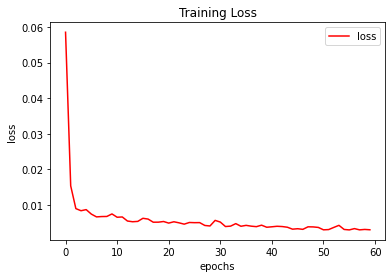

In [ ]:
plt.plot(history.history['loss'], label='loss', color='Red')
plt.title('Training Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

## Loading the dataset for testing :-

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
dataset_test = pd.read_csv("test.csv")
dataset_test

,Date,Open,High,Low,Volume
0,01-01-2020,1194.45,1199.00,1152.20,3137636
1,02-01-2020,1157.00,1159.90,1140.00,3286436
2,03-01-2020,1156.00,1156.00,1132.00,2695237
3,06-01-2020,1162.00,1171.40,1150.10,4494752
4,07-01-2020,1170.95,1173.85,1152.05,2363578
...,...,...,...,...,...
59,25-03-2020,799.00,897.70,784.80,3564864
60,26-03-2020,895.00,947.80,872.30,3635282
61,27-03-2020,960.00,965.00,896.00,2999839
62,30-03-2020,861.00,959.00,861.00,2901443


In [ ]:
real_stock_values = dataset_test.iloc[:,1:2].values #all rows(:) & 2nd column(1:2)1=2nd col & 2-1=1 so one column
real_stock_values

array([[1194.45],
       [1157.  ],
       [1156.  ],
       [1162.  ],
       [1170.95],
       [1145.  ],
       [1155.  ],
       [1167.  ],
       [1155.  ],
       [1162.  ],
       [1173.5 ],
       [1184.85],
       [1194.8 ],
       [1190.  ],
       [1183.45],
       [1181.8 ],
       [1176.  ],
       [1208.9 ],
       [1228.  ],
       [1215.  ],
       [1198.5 ],
       [1191.  ],
       [1185.5 ],
       [1186.85],
       [1170.  ],
       [1195.  ],
       [1284.75],
       [1284.95],
       [1264.05],
       [1270.9 ],
       [1263.  ],
       [1276.95],
       [1270.  ],
       [1306.95],
       [1293.05],
       [1314.  ],
       [1317.  ],
       [1330.  ],
       [1310.  ],
       [1285.  ],
       [1256.  ],
       [1250.  ],
       [1255.  ],
       [1275.  ],
       [1248.2 ],
       [1251.95],
       [1253.5 ],
       [1229.  ],
       [1225.  ],
       [1197.95],
       [1150.  ],
       [1055.6 ],
       [1049.95],
       [1005.  ],
       [1028.  ],
       [ 8

In [ ]:
dataset_total = pd.concat((dataset_train["Open"], dataset_test["Open"]), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)-30:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
x_test =[]
for i in range (30,63):
  x_test.append(inputs[i-30:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price

array([[1200.305 ],
       [1195.6447],
       [1181.3502],
       [1165.8252],
       [1155.243 ],
       [1152.4158],
       [1148.4103],
       [1147.8452],
       [1152.409 ],
       [1155.7322],
       [1159.4579],
       [1165.2043],
       [1173.2418],
       [1182.7565],
       [1189.0614],
       [1190.0084],
       [1187.0944],
       [1181.1259],
       [1183.4158],
       [1194.3251],
       [1203.7068],
       [1205.5903],
       [1200.995 ],
       [1192.6527],
       [1184.8652],
       [1175.1975],
       [1173.7375],
       [1200.5682],
       [1236.3633],
       [1261.9531],
       [1276.2278],
       [1276.7891],
       [1272.6793]], dtype=float32)

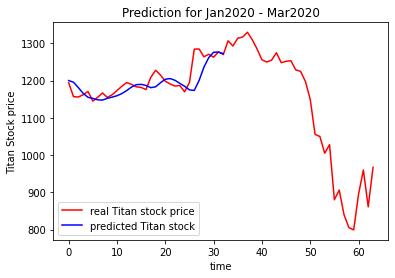

In [ ]:
#Visualize the predictions and see where our model stands and how far off we are 
plt.plot(real_stock_values, color='red', label = 'real Titan stock price')
plt.plot(predicted_stock_price, color='blue', label ='predicted Titan stock')
plt.title("Prediction for Jan2020 - Mar2020")
plt.xlabel("time")
plt.ylabel("Titan Stock price")
plt.legend()
plt.show()

In [ ]:
#calculating rmse
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_values,predicted_stock_price))
print("Total model error:", rmse)

ValueError: ignored

testing second dataset from March 2020 - June 2020

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test2.csv to test2.csv


In [ ]:
dataset_test_2 = pd.read_csv("test2.csv")
dataset_test_2

,Date,Open,High,Low,Volume
0,01-04-2020,929.70,950.00,902.00,2935941
1,03-04-2020,930.00,930.05,855.95,4951957
2,07-04-2020,900.10,954.95,892.30,4186589
3,08-04-2020,935.00,966.40,893.40,5506041
4,09-04-2020,931.65,1044.00,917.35,8532888
5,13-04-2020,1014.50,1014.50,943.20,4399276
6,15-04-2020,990.00,990.00,937.20,5502744
7,16-04-2020,929.00,999.00,915.00,6251881
8,17-04-2020,1001.10,1017.70,956.30,5761685
9,20-04-2020,975.50,982.20,957.00,2557331


In [ ]:
real_stock_values_2 = dataset_test_2.iloc[:,1:2].values
real_stock_values_2

array([[ 929.7 ],
       [ 930.  ],
       [ 900.1 ],
       [ 935.  ],
       [ 931.65],
       [1014.5 ],
       [ 990.  ],
       [ 929.  ],
       [1001.1 ],
       [ 975.5 ],
       [ 958.  ],
       [ 936.7 ],
       [ 922.25],
       [ 910.  ],
       [ 914.2 ],
       [ 930.35],
       [ 932.  ],
       [ 935.2 ],
       [ 928.5 ],
       [ 905.  ],
       [ 887.  ],
       [ 878.5 ],
       [ 857.  ],
       [ 848.45],
       [ 827.  ],
       [ 874.95],
       [ 855.  ],
       [ 846.  ],
       [ 841.5 ],
       [ 827.3 ],
       [ 824.  ],
       [ 854.  ],
       [ 844.9 ],
       [ 856.  ],
       [ 884.9 ],
       [ 885.85],
       [ 895.45],
       [ 898.5 ],
       [ 958.9 ],
       [ 989.  ],
       [ 970.1 ],
       [ 977.  ],
       [1009.  ],
       [1037.  ],
       [ 997.1 ],
       [ 976.  ],
       [ 910.05],
       [ 979.95],
       [ 965.  ],
       [ 955.  ],
       [ 958.1 ],
       [ 980.  ],
       [ 979.  ],
       [ 981.5 ],
       [1010.  ],
       [ 9

In [ ]:
dataset_total = pd.concat((dataset_train["Open"], dataset_test_2["Open"]), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test_2)-30:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
x_test =[]
for i in range (30,57):
  x_test.append(inputs[i-30:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price

array([[1187.943  ],
       [1119.1985 ],
       [1044.7017 ],
       [ 978.5586 ],
       [ 936.3749 ],
       [ 913.208  ],
       [ 920.04224],
       [ 937.69806],
       [ 946.442  ],
       [ 963.4669 ],
       [ 975.8095 ],
       [ 979.4483 ],
       [ 973.1936 ],
       [ 959.97974],
       [ 943.181  ],
       [ 928.3713 ],
       [ 920.1794 ],
       [ 917.1362 ],
       [ 918.0273 ],
       [ 919.65283],
       [ 917.0662 ],
       [ 909.6185 ],
       [ 899.6071 ],
       [ 886.3166 ],
       [ 872.3318 ],
       [ 856.8591 ],
       [ 851.3558 ]], dtype=float32)

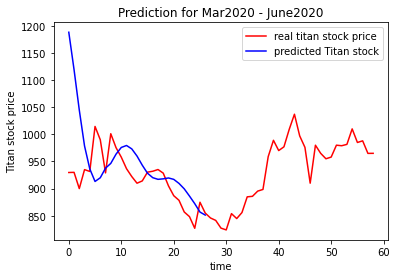

In [ ]:
#Visualize the predictions and see where our model stands and how far off we are 
plt.plot(real_stock_values_2, color='red', label = 'real titan stock price')
plt.plot(predicted_stock_price, color='blue', label ='predicted Titan stock')
plt.title("Prediction for Mar2020 - June2020")
plt.xlabel("time")
plt.ylabel("Titan stock price")
plt.legend()
plt.show()